# Zadanie 1

Za pomocą funkcji: 

```python
sklearn.datasets.make_moons
```

wygeneruj zbiór danych z parametrami: n_samples=500, noise=.01.
  
Następnie przy pomocy
```python
GridSearchCV
``` 
znajdź optymalny parametr C w regresli logistycznej spośród parametrów {0.0001, 10000}.

Wypisz optymalny parametr podany przez GridSearchCV oraz wykonaj rysunki dla regresji logistycznej z najlepszym parametrem.
  


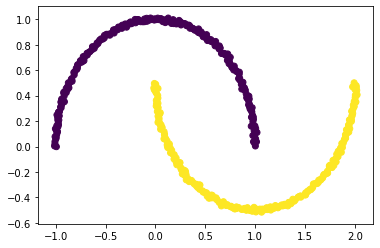

In [1]:
from sklearn.datasets import make_moons
from sklearn.model_selection import GridSearchCV
import sklearn.linear_model as lm
import numpy as np
import matplotlib.pyplot as plt

A1 = make_moons(n_samples=500,noise=.01)

plt.scatter(A1[0][:,0],A1[0][:,1],c=A1[1])
plt.show()

X = A1[0]
y = A1[1]

101.01020000000001


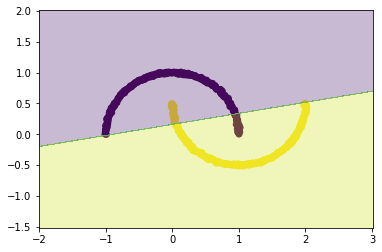

In [2]:
params = {'C': np.linspace(0.0001, 10000, 100)}

model1_prot = GridSearchCV(lm.LogisticRegression(),params)
model1_prot.fit(X,y)

C = model1_prot.best_params_['C']
print(C)
model1 = lm.LogisticRegression(C=C).fit(X,y)

x1_min, x1_max = np.min(X[:,0])-1, np.max(X[:,0])+1
x2_min, x2_max = np.min(X[:,1])-1, np.max(X[:,1])+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max, 1000), np.linspace(x2_min, x2_max, 1000))

yy = model1.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.contourf(xx1,xx2, yy, alpha=.3)
plt.show()

# Zadanie 2
Za pomocą funkcji: 

```python
sklearn.datasets.make_moons
```
wygeneruj 4 zbiory danych z parametrami:

  * n_samples=500, noise=.05
  * n_samples=1000, noise=.3
  * n_samples=200, noise=.05
  * n_samples=200, noise=.3.
  
Jak w zestawie 4, wygeneruj punkty równomiernie na kwadracie zawierającym dane i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. 

Predykcję proszę wykonać przy pomocy SVM 
```python
SVC(kernel='linear', C=1.0, random_state=0)
```

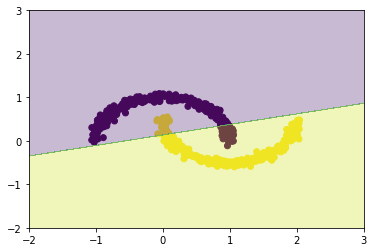

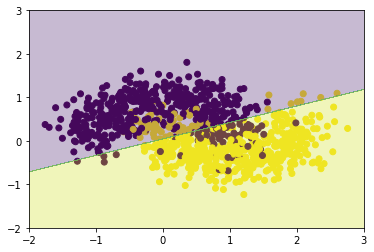

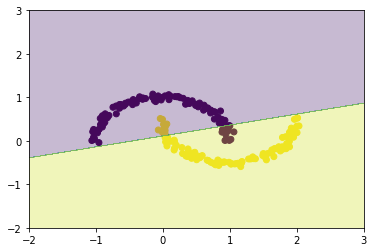

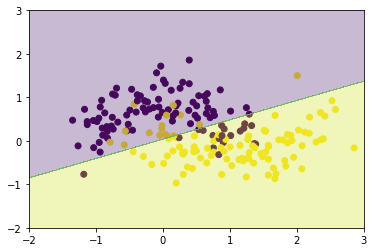

In [3]:
from sklearn.svm import SVC
B = [0,0,0,0]
B[0] = make_moons(n_samples=500,noise=.05)
B[1] = make_moons(n_samples=1000,noise=.3)
B[2] = make_moons(n_samples=200,noise=.05)
B[3] = make_moons(n_samples=200, noise=.3)

model2 = [0,0,0,0]

for i in range(4):
    model2[i] = SVC(kernel='linear', C=1.0, random_state=0).fit(B[i][0],B[i][1])
    
xx1, xx2 = np.meshgrid(np.linspace(-2,3,1000),np.linspace(-2,3,1000))

for i in range(4):
    yy = model2[i].predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)
    
    plt.figure()
    plt.scatter(B[i][0][:,0],B[i][0][:,1],c=B[i][1])
    plt.contourf(xx1,xx2,yy,alpha=.3)
    plt.show()

# Zadanie 3
Analogicznie jak w zestawie 4 predykcji można dokonać dla dowolnego punktu na płaszczyźnie. Wygeneruj punkty równomiernie na kwadracie zawierającym punkty i wykonaj dla nich predykcję.

Oryginalny zbiór danych niech będzie pokolorowany za pomocą oryginalnych klas. 

Wykonaj SVM trzy różne modele na każdym z 4 obrazków powyżej: 
```python
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0)
```
```python
svm=SVC(kernel='rbf', random_state=0, gamma=0.1, C=100.0)
```
```python
svm=SVC(kernel='rbf', random_state=0, gamma=100, C=10)
```

Który z modeli jest najlepszy?

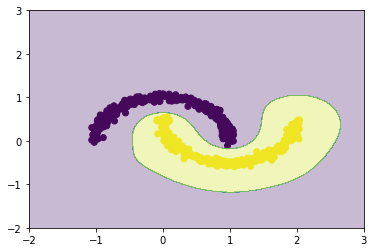

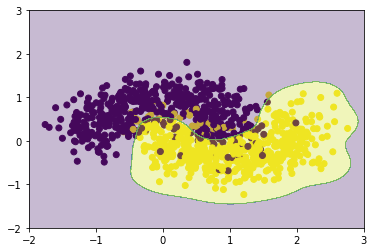

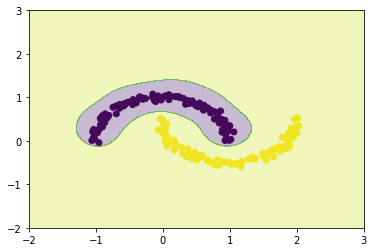

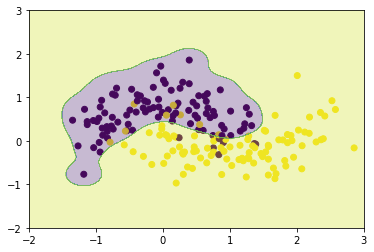

Srednie F1: 0.9556038324420677
Srednia akuratnosc: 0.954


In [6]:
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import train_test_split



X_train, y_train, X_test, y_test = [0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]
for i in range(4):
    #print(B[i][0].shape,B[i][1].shape)
    X_train[i], X_test[i],y_train[i], y_test[i] = train_test_split(B[i][0],B[i][1],test_size=0.5)
    X_train[i].reshape(-1,2)
    #y_train[i].reshape(-1,1)
    #print(X_train[i].shape,y_train[i].shape)
    X_test[i].reshape(-1,2)
    #y_test[i].reshape(-1,1)

SVM = [ SVC(kernel='rbf', random_state=0, gamma=10, C=0.1)]

xx1, xx2 = np.meshgrid(np.linspace(-2,3,1000),np.linspace(-2,3,1000))

f1 = [0,0,0,0]
acc = [0,0,0,0]
for svm in SVM:
    for i in range(4):
        model = svm.fit(X_train[i],y_train[i])
        yy = model.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)
        y_pred = model.predict(X_test[i])
        f1[i] = f1_score(y_test[i],y_pred)
        acc[i] = accuracy_score(y_test[i],y_pred)
        
        plt.figure()
        plt.scatter(B[i][0][:,0],B[i][0][:,1], c=B[i][1])
        plt.contourf(xx1,xx2,yy,alpha=.3)
        plt.show()
    
    print("Srednie F1:", sum(f1)/4)
    print("Srednia akuratnosc:", sum(acc)/4)

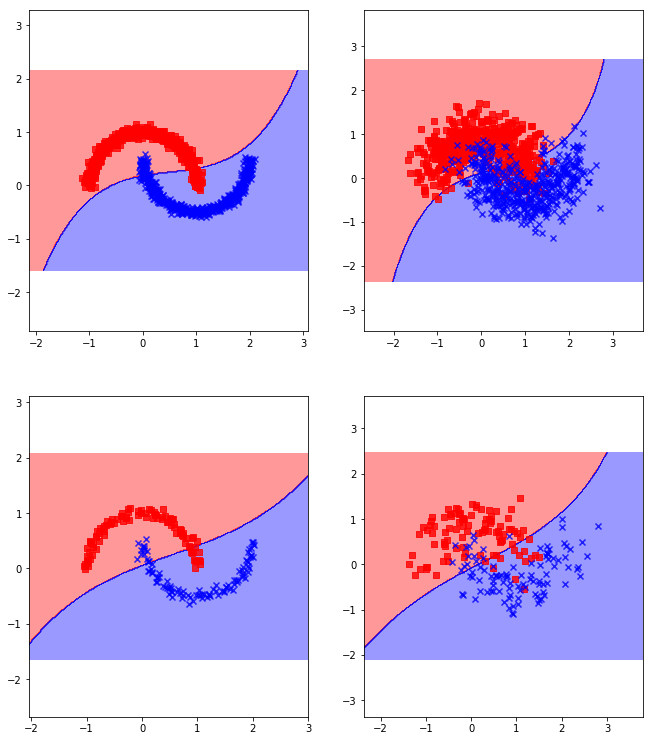

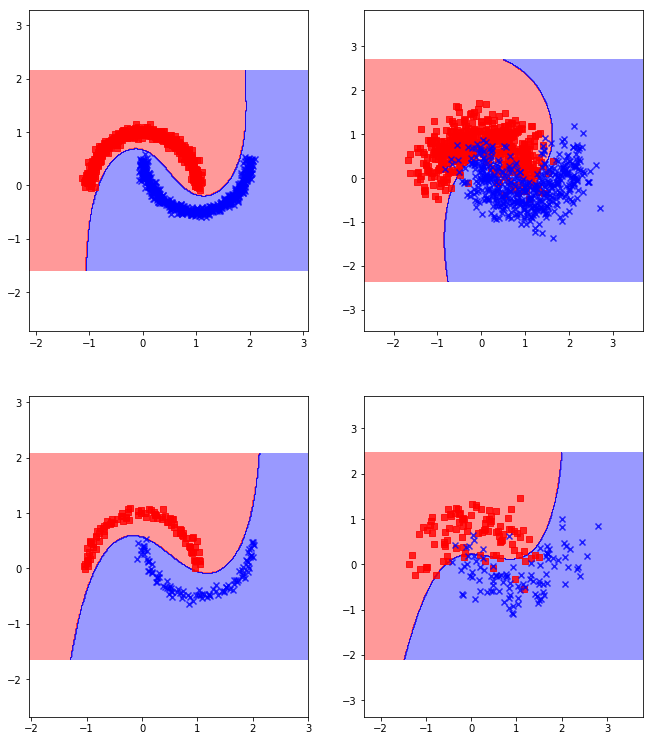

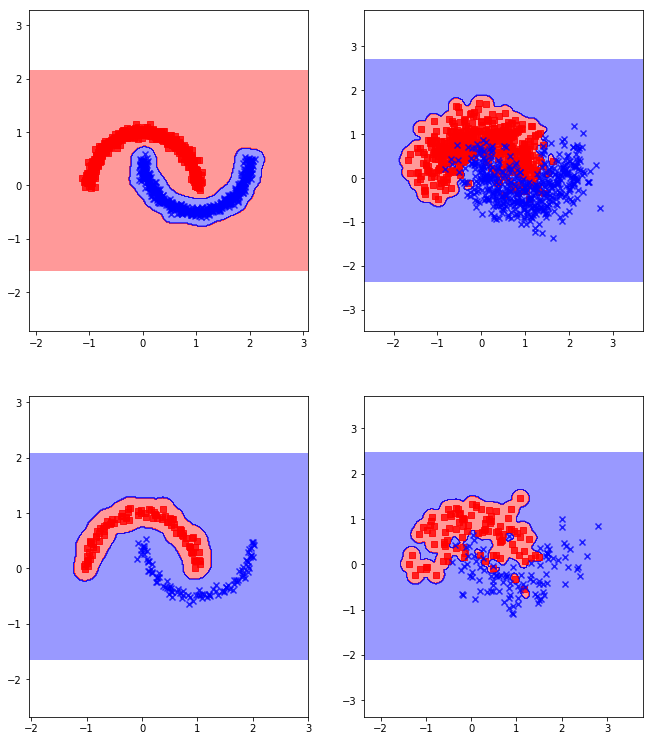

# Zadanie 4 
Dla danych iris (dwie wybrane współrzędne) wytrenuj SVM i wykonaj obraz jak wyżej.


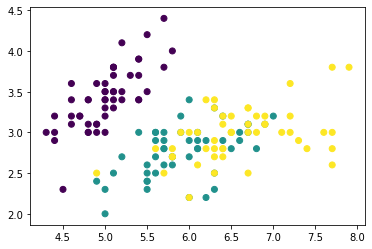

F1: 0.7767857142857143
Akuratnosc: 0.7777777777777778


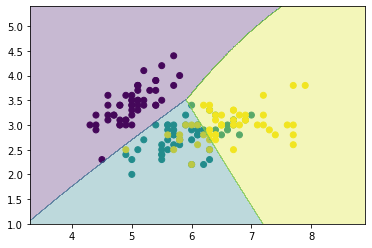

F1: 0.7530864197530863
Akuratnosc: 0.7555555555555555


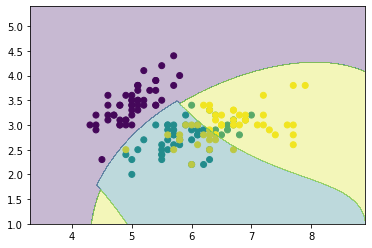

F1: 0.6350709684043018
Akuratnosc: 0.6222222222222222


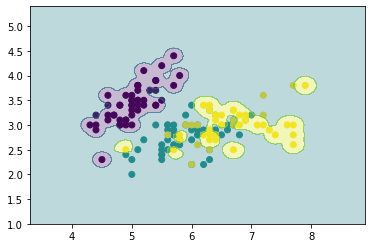

In [41]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

SVM = [SVC(kernel='rbf', random_state=0, gamma=0.1, C=1.0), SVC(kernel='rbf', random_state=0, gamma=0.1, C=100.0), SVC(kernel='rbf', random_state=0, gamma=100, C=10)]

x1_min, x1_max = np.min(X[:,0])-1, np.max(X[:,0])+1
x2_min, x2_max = np.min(X[:,1])-1, np.max(X[:,1])+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,1000),np.linspace(x2_min,x2_max,1000))

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = .3)

for svm in SVM:
    model = svm.fit(X_train,y_train)
    yy = model.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)
    y_pred = model.predict(X_test)
    print("F1:", f1_score(y_test,y_pred,average='macro'))
    print("Akuratnosc:", accuracy_score(y_test,y_pred))
    
    plt.figure()
    plt.scatter(X[:,0],X[:,1], c=y)
    plt.contourf(xx1,xx2,yy,alpha=.3)
    plt.show()

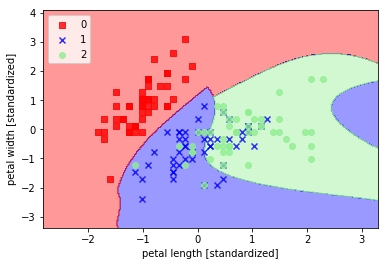

# Zadanie 5 
Dla danych iris (dwie wybrane współrzędne) wytrenuj SVM dobierając optymalne parametry za pomocą cross-validation.


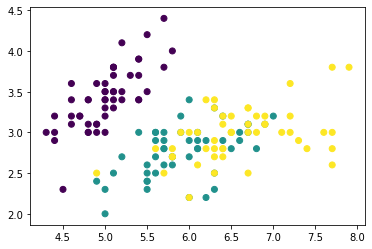

{'C': 0.01, 'gamma': 2.050612244897959}
F1: 0.8198378540686617
Akuratnosc: 0.82


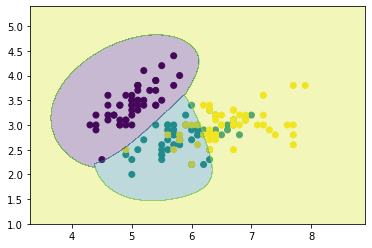

In [11]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

# C_params = {'C': np.linspace(.01,1000,100)}
# gamma_params = {'gamma': np.linspace(0.1,1000,100)}
# params = [gamma_params,C_params]

params = {
    'C': np.logspace(-2.,4.,num=50),
    'gamma': np.linspace(.01,100,50)
}

model5_prot = GridSearchCV(SVC(kernel='rbf', random_state=0),params)
model5_prot.fit(X,y)
print(model5_prot.best_params_)

C = model5_prot.best_params_['C']
gamma = model5_prot.best_params_['gamma']

model5 = SVC(kernel='rbf', random_state=0, gamma=gamma, C=C).fit(X,y)

x1_min, x1_max = np.min(X[:,0])-1, np.max(X[:,0])+1
x2_min, x2_max = np.min(X[:,1])-1, np.max(X[:,1])+1
xx1, xx2 = np.meshgrid(np.linspace(x1_min,x1_max,1000),np.linspace(x2_min,x2_max,1000))

yy = model5.predict(np.c_[xx1.flatten(),xx2.flatten()]).reshape(xx1.shape)
y_pred = model5.predict(X)
print("F1:", f1_score(y,y_pred,average='macro'))
print("Akuratnosc:", accuracy_score(y,y_pred))

plt.figure()
plt.scatter(X[:,0],X[:,1], c=y)
plt.contourf(xx1,xx2,yy,alpha=.3)
plt.show()


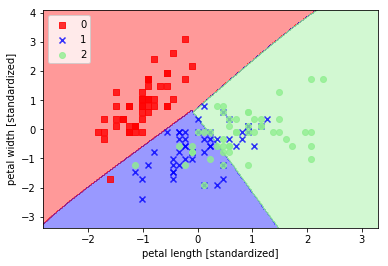